In [1]:
# 1. Importing necessary Libraries and Data

#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#supress warnings
import warnings
warnings.filterwarnings("ignore")

# Sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
#Environment settings

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)

# pd.set_option('display.float_format', lambda x: '%.4f' % x) 

In [3]:
# Reading the dataset
df_leads = pd.read_csv("Leads_assignment.csv")

In [4]:
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df_leads.shape

(9240, 37)

In [6]:
# 2. Data Understanding and Inspection

# Check summary of all numerical columns to understand the dataset better in terms of spread and 
# also spot anything unusual

df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# checking number of unique values in each column
df_leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [8]:
# Check data types of columns and nulls
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
#Checking for count of missing values in each column
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# Check for duplicate rows
print(df_leads.duplicated().sum())


0


In [11]:
# Data Cleaning 

# List of columns having 'Select' as value

cols_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [12]:
# Converting 'Select' values to NaN.
df_leads = df_leads.replace('Select', np.nan)

In [13]:
# Checking if all 'Select' values have been handled in the columns
cols_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

[]


In [14]:
# Now, there are no 'Select' values in the dataframe df_leads.

In [15]:
#Handling missing values 

# Calculating Missing Values Percentage

100*(df_leads.isna().mean()).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [16]:
#Dropping columns more than 40% null values 

# user defined function to drop columns and know the shape before and after dropping

def dropNullColumns(data ,percentage=40):
    
    missing_perc = 100*(data.isna().mean()).sort_values(ascending=False)
    col_to_drop = missing_perc[missing_perc>=percentage].index.to_list()
    print("Total columns dropped: ",len(col_to_drop),"\n")
    print("List of columns dropped : " , col_to_drop,"\n")
    print("Shape before dropping columns: ",data.shape)
    
    data.drop(labels=col_to_drop,axis=1, inplace=True)
    
    print("Shape after dropping columns: ",data.shape)

In [17]:
# dropping columns using UDF
dropNullColumns(df_leads) 

Total columns dropped:  7 

List of columns dropped :  ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index'] 

Shape before dropping columns:  (9240, 37)
Shape after dropping columns:  (9240, 30)


In [18]:
# Checking the percentage of null values for remaining columns

100*(df_leads.isna().mean()).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

In [19]:
#Columns with Categorical data

# Select the columns with non-numeric data type
categorical_cols = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()

# Print the selected columns
print(categorical_cols)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [20]:
columnsList= ["City","Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']

for i in columnsList:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("___"*40,"\n")

value_counts % for : City 

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : Specialization 

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Manageme

In [21]:
# 🧹Dropping the following columns

#'City',
#'Tags',
#'Country',
#'What matters most to you in choosing a course'



# Dropping Columns
print("Before Drop",df_leads.shape)
df_leads.drop(['City','Tags','Country','What matters most to you in choosing a course'],axis=1,inplace=True)
print("After Drop",df_leads.shape)

Before Drop (9240, 30)
After Drop (9240, 26)


In [22]:
#🪄Imputing the following columns

#'Specialization',
#'Lead Source',
#'Last Activity',
#'What is your current occupation'



# Imputing values as per the above observations/insights

missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
df_leads=df_leads.fillna(value=missing_values)

In [23]:
# Re Checking the percentage of null values for remaining columns

round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted           

In [24]:
#Columns with numerical data 

# TotalVisits
print("TotalVisits - Value Counts")
print("----------------------------------------")
df_leads.TotalVisits.value_counts().head(10)

TotalVisits - Value Counts
----------------------------------------


0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

In [25]:
# TotalVisits missing values to be imputed with mode
df_leads['TotalVisits'].fillna(df_leads['TotalVisits'].mode()[0], inplace=True)

In [26]:
# Page Views Per Visit
print("Page Views Per Visit - Value Counts")
print("----------------------------------------")
df_leads.TotalVisits.value_counts().head(10)

Page Views Per Visit - Value Counts
----------------------------------------


0.0    2326
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

In [27]:
# Page Views Per Visit missing values to be imputed with mode

df_leads['Page Views Per Visit'].fillna(df_leads['Page Views Per Visit'].mode()[0], inplace=True)

In [28]:
# Re Checking the percentage of null values after handling categorical and numerical columns

round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

In [29]:
#Removing unwanted columns 
# Last Notable Activity
print("Last Notable Activity")
print("----------------------------------------")
100*df_leads['Last Notable Activity'].value_counts(normalize=True)

Last Notable Activity
----------------------------------------


Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

In [30]:
# Handling columns with only one unique value
#check for columns with one unique value, count and freq is same

df_leads.describe(include = 'object')

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,9240,5,21,2,2,17,19,6,2,1,2,2,2,2,2,1,1,1,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,Others,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
freq,1,4886,2904,8506,9238,3540,3380,8290,9226,9240,9238,9239,9239,9236,9233,9240,9240,9240,9240,6352,3407


In [31]:
# List of columns with one unique value whose count and frequency are same, we will drop these columns
cols_to_drop = ['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']

print("Before Dropping Columns",df_leads.shape)
df_leads.drop(cols_to_drop, axis = 1, inplace = True)
print("After Dropping Columns",df_leads.shape)

Before Dropping Columns (9240, 26)
After Dropping Columns (9240, 21)


In [32]:
#Dropping columns of no use for modeling

# Dropping Columns
print("Before Dropping Columns",df_leads.shape)
df_leads.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)
print("After Dropping Columns",df_leads.shape)

Before Dropping Columns (9240, 21)
After Dropping Columns (9240, 18)


In [33]:
# get the percentage of missing values in each row,output in descending order so high value will come on top

100*(df_leads.isna().mean(axis=1)).sort_values(ascending=False).head(10)

0       0.0
6064    0.0
6156    0.0
6157    0.0
6158    0.0
6159    0.0
6160    0.0
6161    0.0
6162    0.0
6163    0.0
dtype: float64

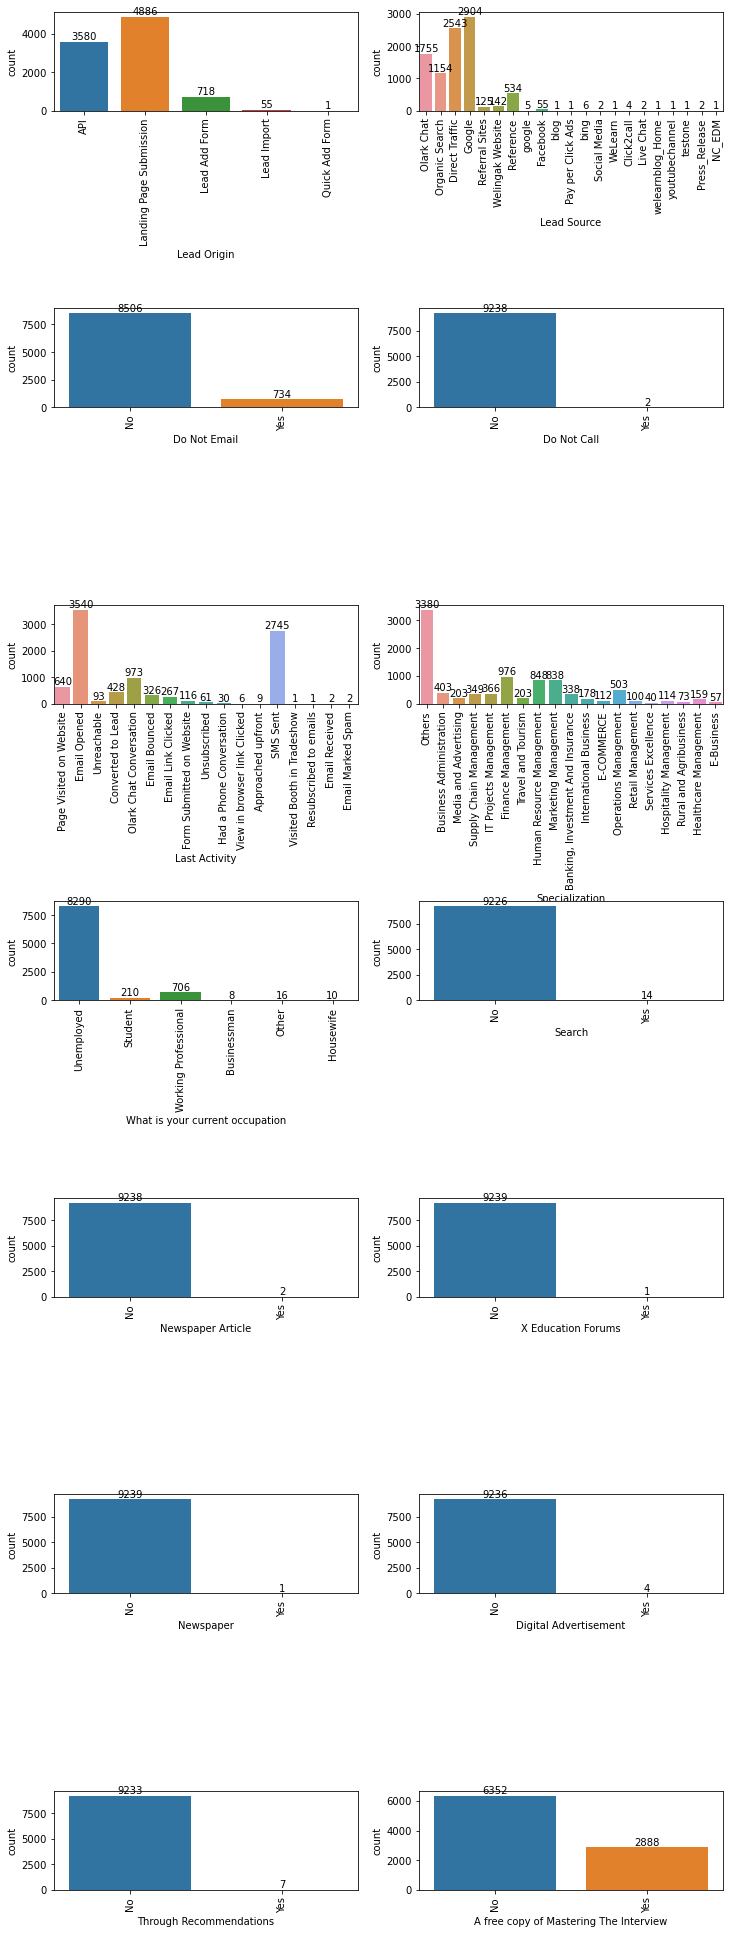

In [34]:
#Checking & Dropping Category Columns that are Skewed

#Checking skewness in categorical columns

# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=df_leads) 
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.show()


In [35]:
# Dropping categorical columns with highly skewed data

print("Before Drop: ",df_leads.shape)
df_leads.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print("After Drop: ",df_leads.shape)

Before Drop:  (9240, 18)
After Drop:  (9240, 11)


In [36]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


In [37]:
#Outlier Analysis
#For Numerical Columns

def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = df_leads[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')
        

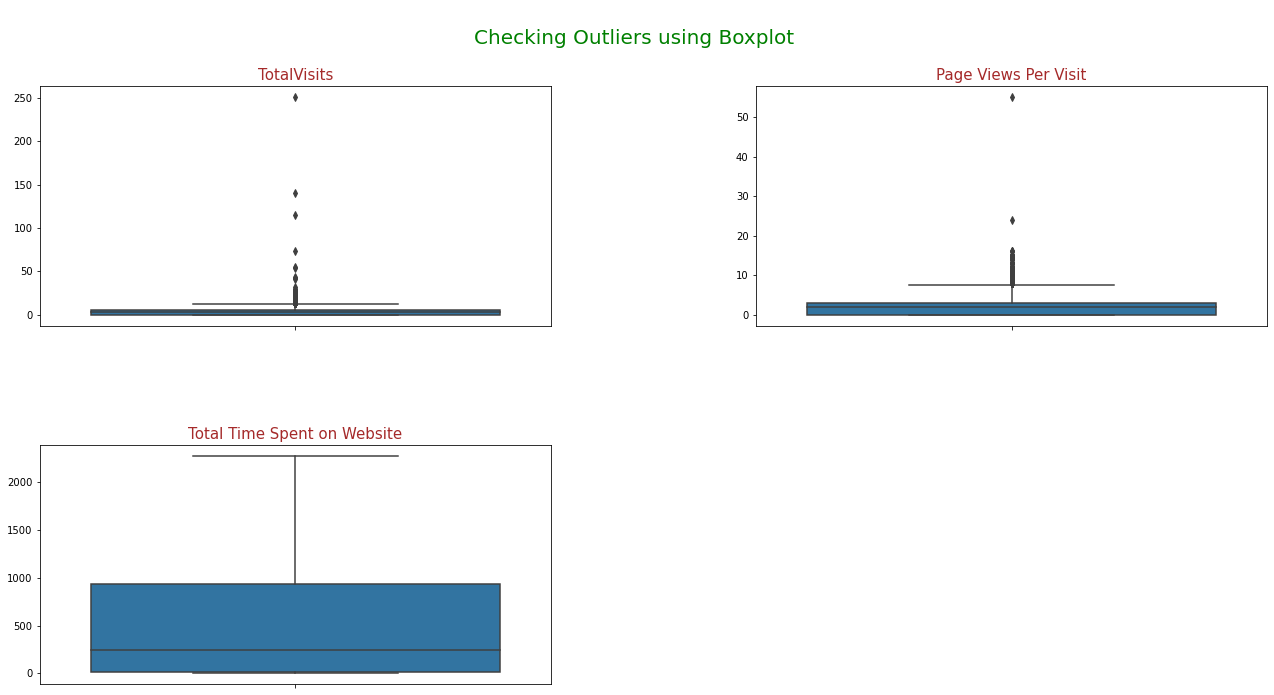

In [38]:
# Checking outliers for numerical variables other than target variable 
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF 
Check_Outliers(df_leads,num_cols)

In [39]:
#Capping Outliers for the treatment

# before outlier treatment
df_leads.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,251.000000,2272.000000,55.000000


In [40]:
# Defining UDF to treat outliers via capping and flooring

def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])

In [41]:
# Checking outliers for numerical variables other than target variable 
capping_cols = ["TotalVisits","Page Views Per Visit"]

# UDF 
Outlier_treatment(df_leads,capping_cols)

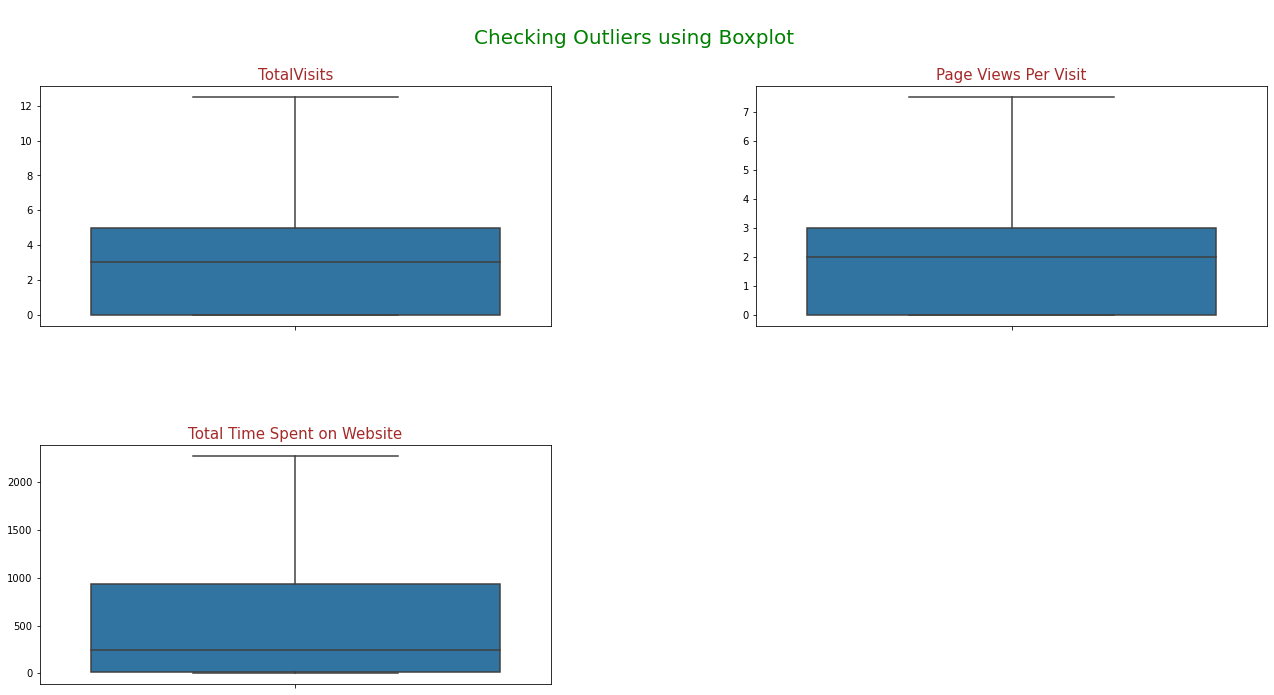

In [42]:
# Checking Boxplot after Outlier Treatment

num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF for boxplot
Check_Outliers(df_leads,num_cols)

In [43]:
# after outlier treatment detailed percentile values
df_leads.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.213853,487.698268,2.274987
std,0.486714,3.005136,548.021466,1.917776
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,12.500000,2272.000000,7.500000


In [44]:
#Fixing Invalid values & Standardising Data in columns
#Checking if entries in data are in correct format or not , casing styles (UPPER,lower)
#Checking data types of columns

df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


In [45]:
## Categorical Variables 

columnsList_cat = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
                  "What is your current occupation","A free copy of Mastering The Interview"]

for i in columnsList_cat:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("_^_"*40,"\n")

value_counts % for : Lead Origin 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 

_^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^_ 

value_counts % for : Lead Source 

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.0108

In [52]:
# Grouping low frequency value levels to Others
df_leads['Lead Source'] = df_leads['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

# Changing google to Google
df_leads['Lead Source'] = df_leads['Lead Source'].replace("google","Google")

In [53]:
# value_counts percentage after replace
df_leads["Lead Source"].value_counts(normalize=True)*100

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: Lead Source, dtype: float64

In [54]:
# Grouping low frequency value levels to Others 
df_leads['Last Activity'] = df_leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [55]:
# value_counts percentage after replace
df_leads['Last Activity'].value_counts(normalize=True)*100

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

In [56]:
# Renaming column name to "Free_copy" from "A free copy of Mastering The Interview"
df_leads.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

# Renaming column name to "Current_occupation" from "What is your current occupationA free copy of Mastering The Interview"
df_leads.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)

In [57]:
# Mapping binary categorical variables (Yes/No to 1/0) 
df_leads['Do Not Email'] = df_leads['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

df_leads['Free_copy'] = df_leads['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)


In [58]:
# Checking Data-types of variables
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current_occupation           9240 non-null   object 
 10  Free_copy                    9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


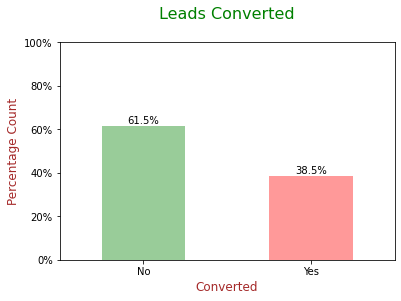

In [59]:
#DATA ANALYSIS

#Checking if Data is Imbalanced or not

## ploting the results on bar plot

ax=(100*df_leads["Converted"].value_counts(normalize=True)).plot.bar(color=["Green","Red"],alpha=0.4)

# Adding and formatting title
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Green'})


# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.show()


In [60]:
#Insights:

#Conversion rate is of 38.5%, meaning only 38.5% of the people have converted to leads.(Minority)
#While 61.5% of the people didnt convert to leads. (Majority)

In [61]:
### Ratio of Data Imbalance
ratio=(df_leads["Converted"].value_counts(normalize=True).loc[0])/(df_leads["Converted"].value_counts(normalize=True).loc[1])

print("Data Imbalance Ratio : {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio : 1.59 : 1


In [62]:
#Univariate Analysis

df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0


In [63]:
#Univariate Analysis for Categorical Variables
#List of categorical columns
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Free_copy","Lead Source","Last Activity","Specialization"]

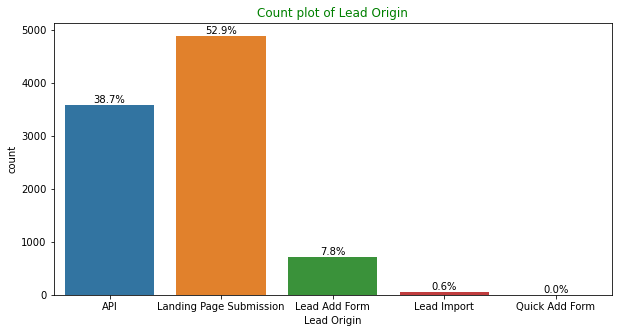

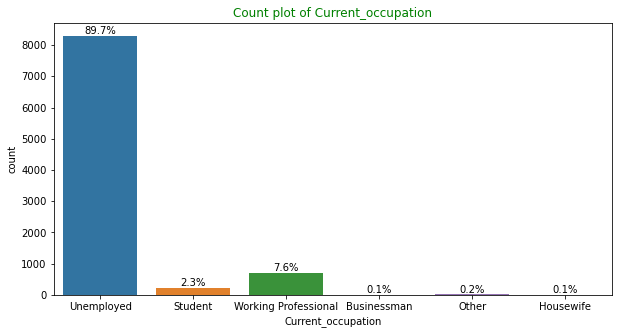

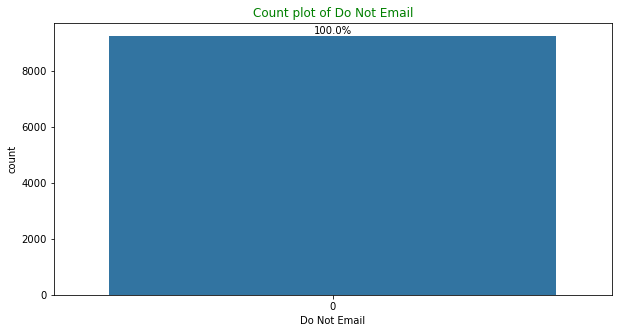

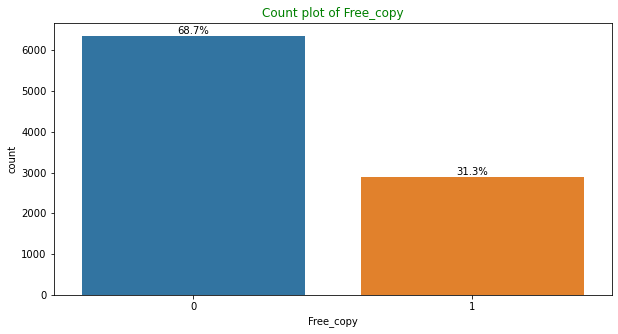

In [64]:
# countplot of columns with its value_counts percentage as annotation
for i in cat_cols[:4]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df_leads)
    total=len(df_leads[i])
    plt.xticks(rotation=0)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        

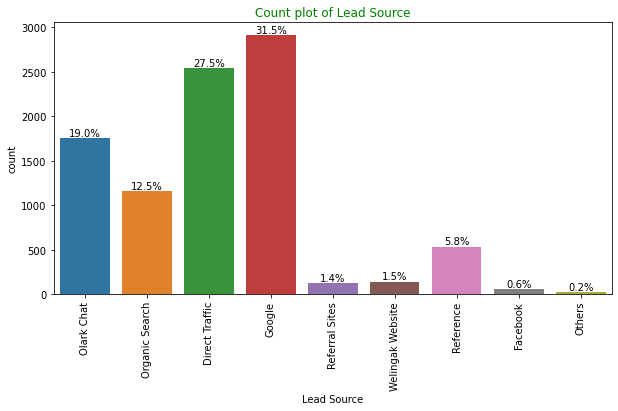

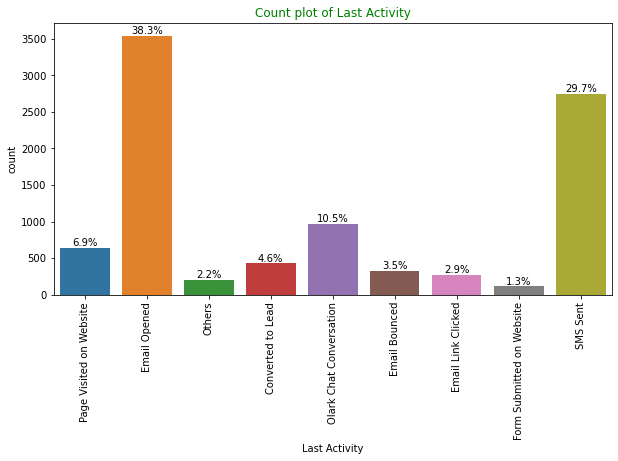

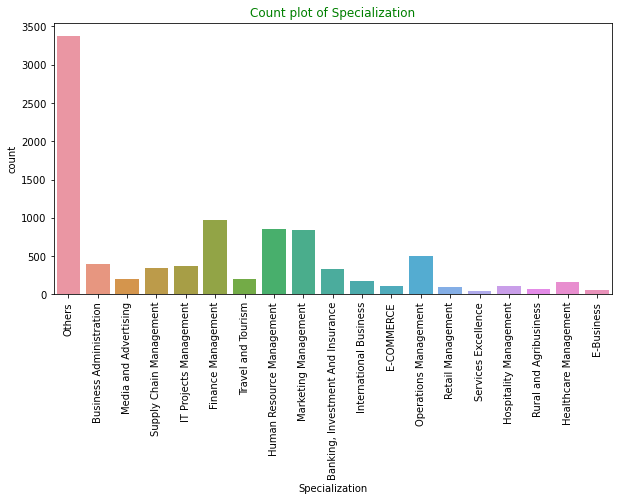

In [65]:
# Barplot for remaining columns from cat_cols (Did separate to rotate xticks 90* so labels doesnt become messy)
for i in cat_cols[4:]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df_leads)
    total=len(df_leads[i])
    plt.xticks(rotation=90)
    
    
    if i!="Specialization":        # (not doing for Specialization xtick labels will be messy)
        for p in ax.patches:
            text = '{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()

            ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    else:
        pass

In [66]:
#Insights Univariate:

#Here is the list of features from variables which are present in majority (Converted and Not Converted included)

#Lead Origin: "Landing Page Submission" identified 53% customers, "API" identified 39%.

#Current_occupation: It has 90% of the customers as Unemployed

#Do Not Email: 92% of the people has opted that they dont want to be emailed about the course.

#Lead Source: 58% Lead source is from Google & Direct Traffic combined

#Last Activity: 68% of customers contribution in SMS Sent & Email Opened activities


In [67]:
#Bivariate Analysis
#Bivariate Analysis for Categorical Variables

In [68]:
# UDF "Bivariate_cat" tells comparision between Actual Distribution (value_count percentage) from the data and 
# 2nd graph tell the Lead Conversion Rate in percentage (how much leads are converted from 1st plot distribution)

def Bivariate_cat(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name),color="Brown", fontsize=18)
    
    # 1st plot in subplot
    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name),color="blue")
    ax=sns.countplot(x=variable_name,hue=Target,data=df_leads,palette="prism_r",alpha=0.46)
    
    total=len(df_leads[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")
    
    # Annotation for 1st plot        
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
# 2nd plot
    plt.subplot(1,2,2)
    plt.title("Lead Conversion Rate of {}".format(variable_name),color="green",fontsize=12)
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="BuGn",alpha=0.85)   #ax1 is for annotation
    
    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
    
    # Annotation for 2nd plot
    # Calculate percentage above bars in countplot (Conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

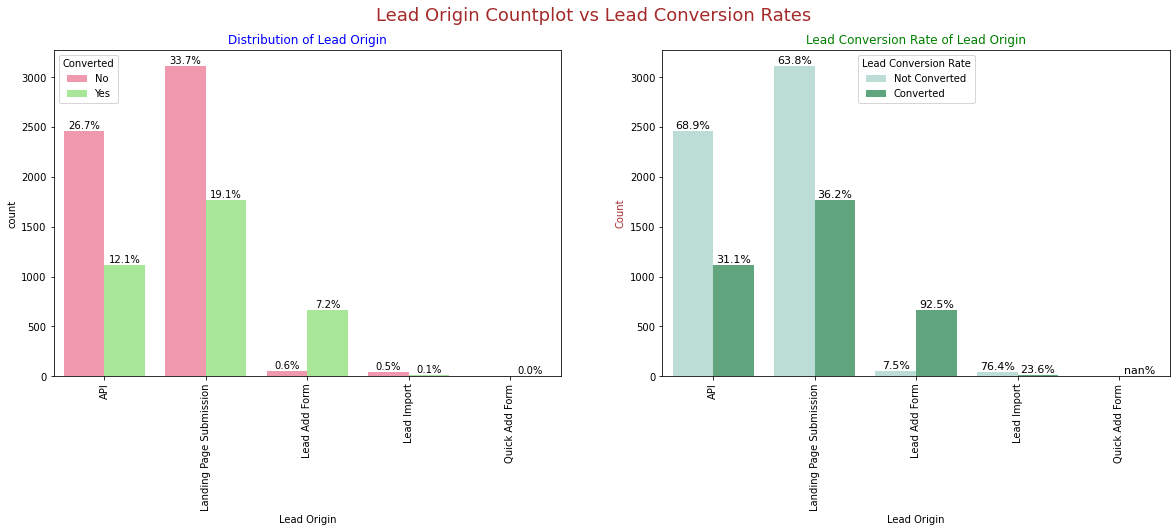

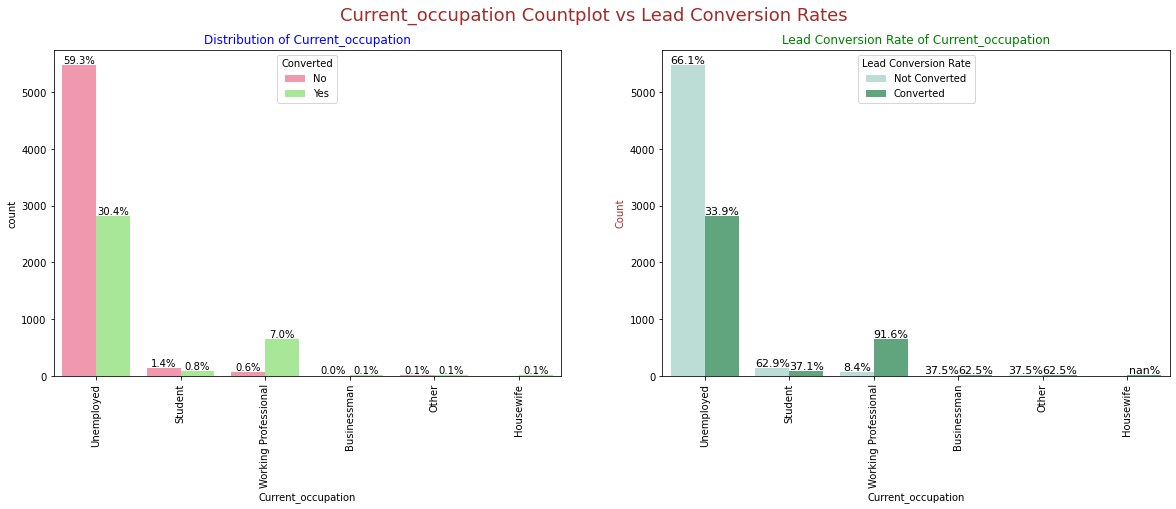

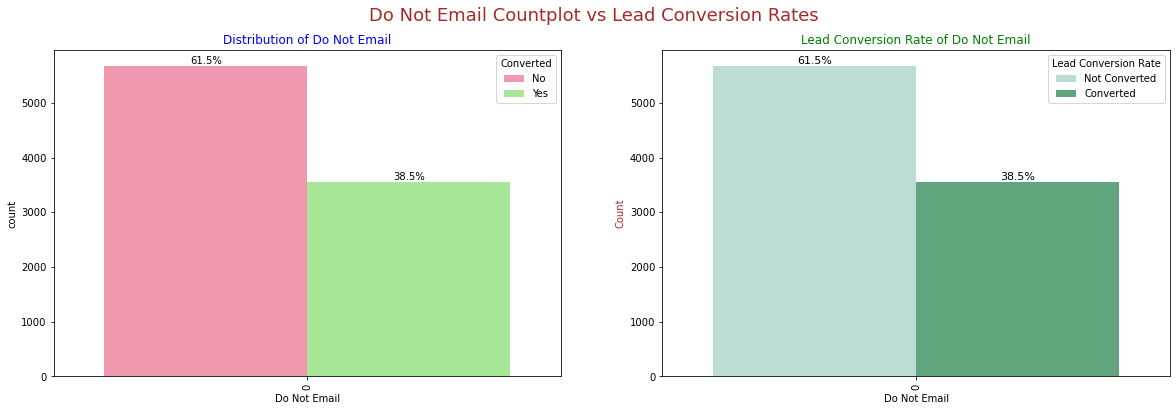

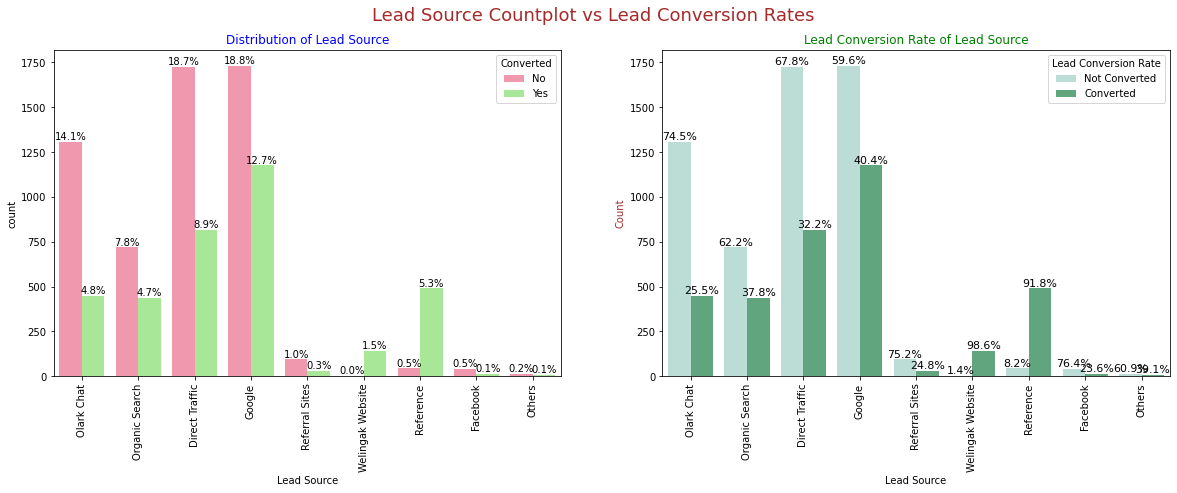

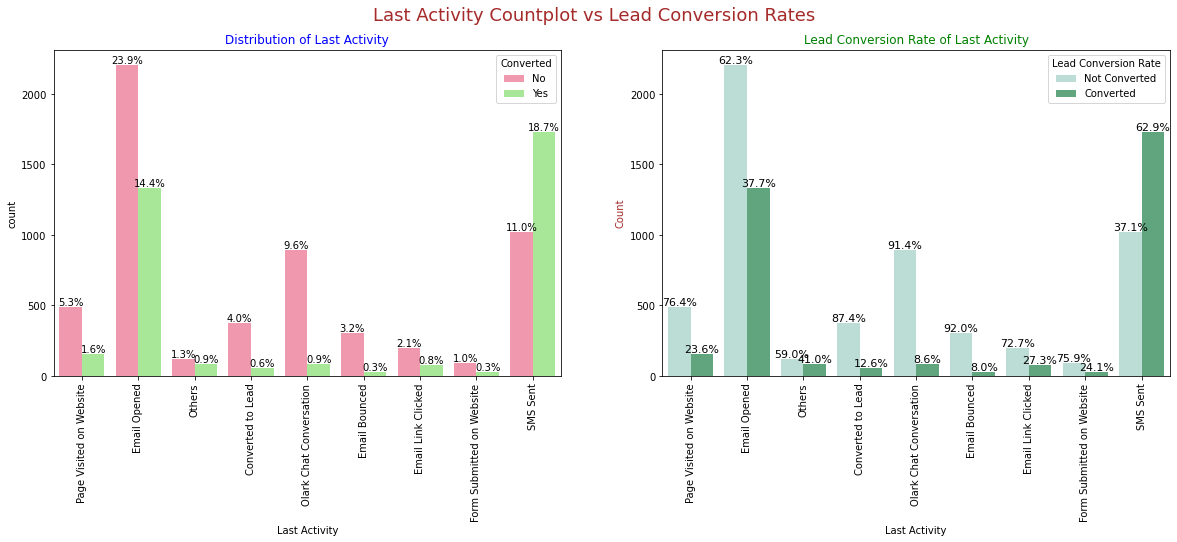

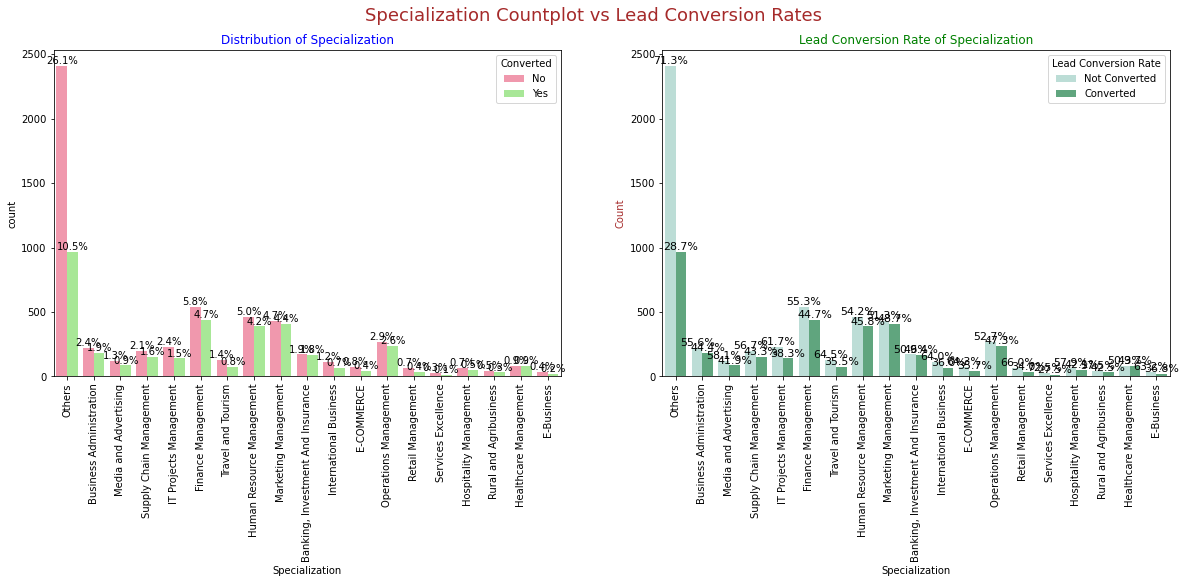

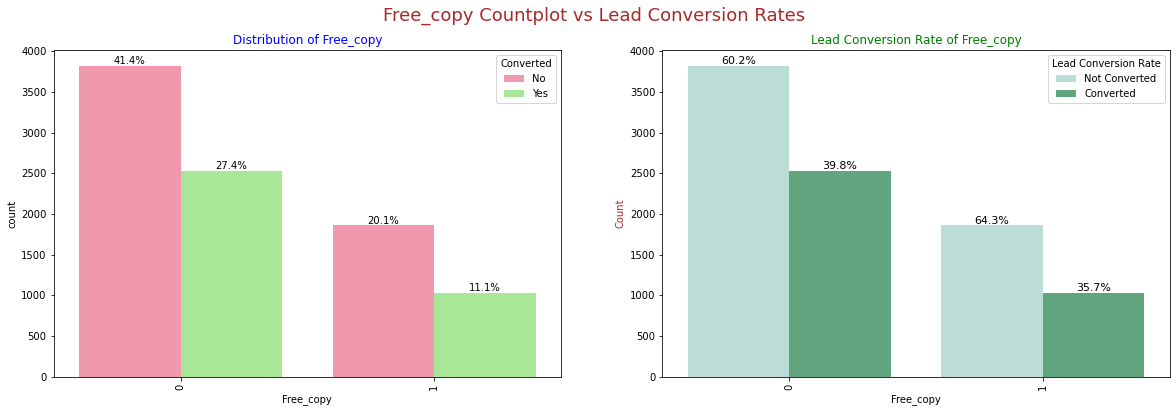

In [69]:
# Bivariate Analysis for all these variables using loop and UDF
# Comparision between variables w.r.t. 'Converted' (Target variable) , taking one categorical column w.r.t target variable as 'hue'
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Lead Source","Last Activity","Specialization","Free_copy"]

for i in cat_cols:
    Bivariate_cat(df_leads,variable_name=i)

<Figure size 1152x288 with 0 Axes>

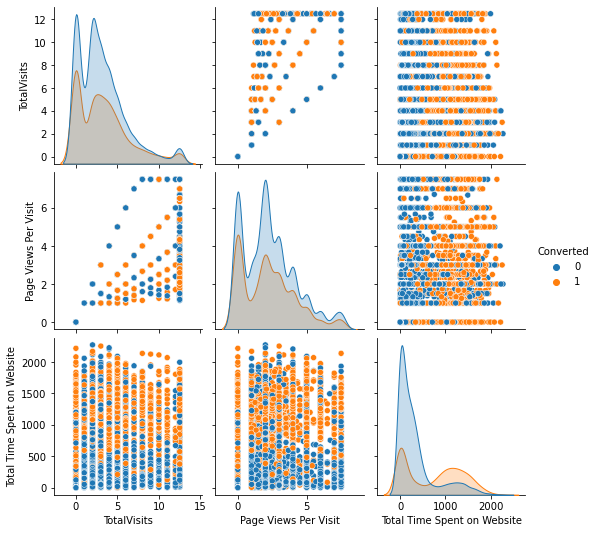

In [70]:
#Bivariate Analysis for Numerical Variables
plt.figure(figsize=(16, 4))
sns.pairplot(data=df_leads,vars=num_cols,hue="Converted")                                  
plt.show()

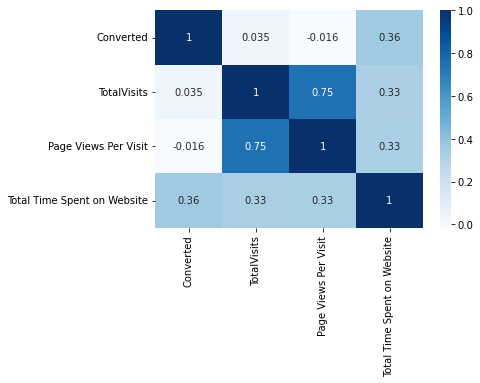

In [72]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
# Heatmap to show correlation between numerical variables
sns.heatmap(data=df_leads[num_cols].corr(),cmap="Blues",annot=True)
plt.show()


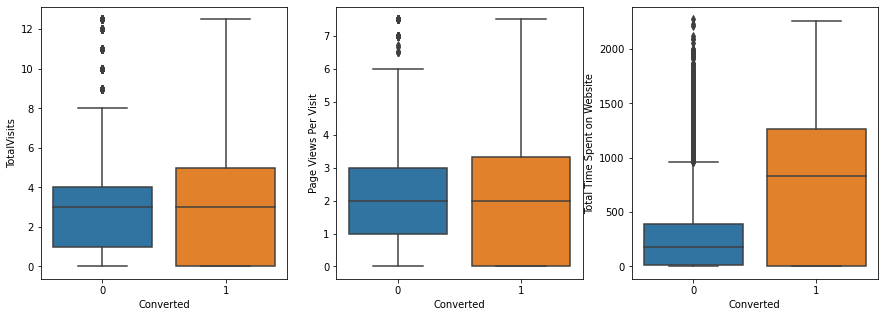

In [73]:
# Boxplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_leads)
plt.show()

In [74]:
#Data Preparation
# Dummy Variables

df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0


In [75]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df_leads[["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"]], drop_first=True)

# Adding the results to the master dataframe
df_leads = pd.concat([df_leads, dummy], axis=1)

In [76]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [77]:
# We have created dummies for the below variables, so we can drop them

df_leads = df_leads.drop(["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"],1)
df_leads.shape

(9240, 49)

In [78]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Free_copy                                 9240 non-null   int64  
 6   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 8   Lead Origin_Lead Import                   9240 non-null   uint8  
 9   Lead Origin_Quick Add Form                9240 non-null   uint8  
 10  Lead Source_Facebook                

In [79]:
#Test-Train Split

# Putting predictor variables to X

X = df_leads.drop('Converted', axis=1)

# Putting Target variables to y
y = df_leads["Converted"]

In [80]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 48) 
y_train: (6468,)


In [81]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 48) 
y_test: (2772,)


In [82]:
#Feature Scaling
# using standard scaler for scaling the features
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [83]:
# X-train dataframe after standard scaling
X_train.head()


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
1871,0.0,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
6795,0.0,0.262370,0.005716,-0.488713,1.485511,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3516,0.0,0.594206,-0.691418,0.123715,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8105,0.0,0.594206,1.365219,1.432322,-0.673169,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3934,0.0,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [84]:
# Checking the Lead Conversion Rate (LCR) - "Converted" is our Target Variable
# We will denote Lead Conversion Rate with 'LCR' as its short form

LCR = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
LCR

38.53896103896104

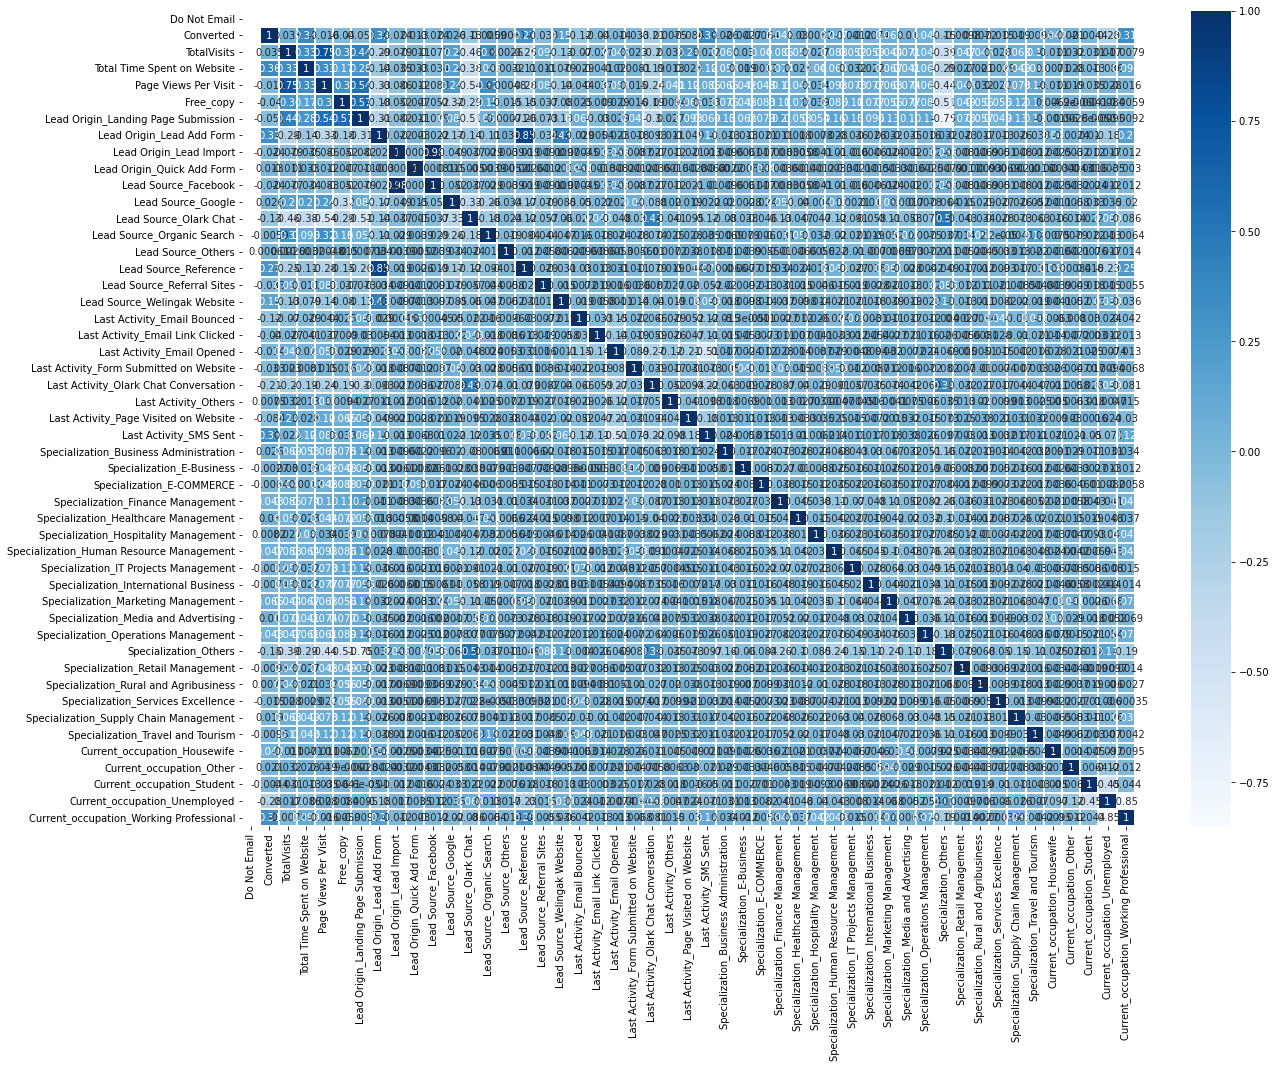

In [85]:
#Looking at Correlations
#Feature elimination based on correlations

# analyse correlation matrix
plt.figure(figsize = (20,15))        
sns.heatmap(df_leads.corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

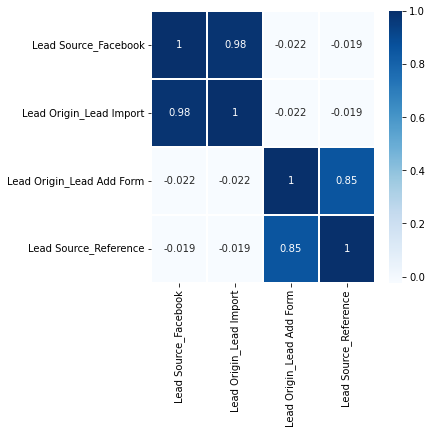

In [86]:
# as the above heatmap has so many columns lets breakdown suspected variables which migh have high correlation with each other
# analysing variables which might be highly correlated with each other from same class from above graph
plt.figure(figsize = (5,5))        
sns.heatmap(df_leads[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

In [87]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

In [88]:
#Model Building

#Feature Selection Using RFE (Recursive Feature Elimination)
# Lets use RFE to reduce variables 
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [89]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 32),
 ('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Free_copy', False, 21),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 20),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 24),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 9),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 30),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 14),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 

In [90]:
# instead of using as zip using this for more readablility

# Check the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

,features,Feature Chosen,Ranking
22,Last Activity_SMS Sent,True,1
41,Current_occupation_Housewife,True,1
35,Specialization_Others,True,1
28,Specialization_Hospitality Management,True,1
20,Last Activity_Others,True,1
19,Last Activity_Olark Chat Conversation,True,1
17,Last Activity_Email Opened,True,1
15,Last Activity_Email Bounced,True,1
14,Lead Source_Welingak Website,True,1
12,Lead Source_Reference,True,1


In [91]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current_occupation_Housewife',
       'Current_occupation_Working Professional'],
      dtype='object')

In [92]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit', 'Free_copy',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Speci

In [93]:
# User defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

In [94]:
#Model 1

# Building model using statsmodels, for the detailed statistics

# columns selected by RFE to be used for this model 
rfe_col=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()  

logm1.params

const                                      -0.929643
Total Time Spent on Website                 1.055070
Lead Origin_Landing Page Submission        -1.238873
Lead Source_Olark Chat                      0.927496
Lead Source_Others                          0.963724
Lead Source_Reference                       2.938917
Lead Source_Welingak Website                5.433743
Last Activity_Email Bounced                -1.016214
Last Activity_Email Opened                  0.809915
Last Activity_Olark Chat Conversation      -0.690260
Last Activity_Others                        1.124692
Last Activity_SMS Sent                      1.929869
Specialization_Hospitality Management      -1.060803
Specialization_Others                      -1.175899
Current_occupation_Housewife               22.989851
Current_occupation_Working Professional     2.673814
dtype: float64

In [95]:
#Let's see the summary of our logistic regression model
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2727.1
Date:                Mon, 05 Jun 2023   Deviance:                       5454.1
Time:                        13:00:27   Pearson chi2:                 8.06e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3850
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [96]:
#Model 2



# Dropping 'Current_occupation_Housewife' column
rfe_col=rfe_col.drop("Current_occupation_Housewife")
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

logm2.params

const                                     -0.920975
Total Time Spent on Website                1.053942
Lead Origin_Landing Page Submission       -1.233888
Lead Source_Olark Chat                     0.926589
Lead Source_Others                         0.956796
Lead Source_Reference                      2.957574
Lead Source_Welingak Website               5.433266
Last Activity_Email Bounced               -1.026487
Last Activity_Email Opened                 0.807604
Last Activity_Olark Chat Conversation     -0.695973
Last Activity_Others                       1.114136
Last Activity_SMS Sent                     1.919209
Specialization_Hospitality Management     -1.067911
Specialization_Others                     -1.179710
Current_occupation_Working Professional    2.665874
dtype: float64

In [97]:
#Let's see the summary of our logistic regression model
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2734.5
Date:                Mon, 05 Jun 2023   Deviance:                       5469.0
Time:                        13:00:47   Pearson chi2:                 8.09e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3836
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [101]:
#Model 3
# Dropping 'Lead Source_Facebook' column
rfe_col=rfe_col.drop("Lead Source_Others")
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()  

logm4.params

const                                     -0.903890
Total Time Spent on Website                1.051968
Lead Origin_Landing Page Submission       -1.243095
Lead Source_Olark Chat                     0.917136
Lead Source_Reference                      2.946242
Lead Source_Welingak Website               5.425696
Last Activity_Email Bounced               -1.031518
Last Activity_Email Opened                 0.805559
Last Activity_Olark Chat Conversation     -0.694138
Last Activity_Others                       1.117628
Last Activity_SMS Sent                     1.914872
Specialization_Hospitality Management     -1.071761
Specialization_Others                     -1.188329
Current_occupation_Working Professional    2.659976
dtype: float64

In [102]:
#Let's see the summary of our logistic regression model
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2736.2
Date:                Mon, 05 Jun 2023   Deviance:                       5472.3
Time:                        13:02:28   Pearson chi2:                 8.08e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3833
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [103]:
# Now checking VIFs for all variables in the Model 4 
get_vif(X_train_rfe)

,Features,VIF
0,Lead Origin_Landing Page Submission,2.82
1,Specialization_Others,2.65
2,Last Activity_Email Opened,2.60
3,Last Activity_SMS Sent,2.40
4,Lead Source_Olark Chat,2.16
5,Last Activity_Olark Chat Conversation,1.80
6,Lead Source_Reference,1.33
7,Total Time Spent on Website,1.24
8,Current_occupation_Working Professional,1.21
9,Last Activity_Email Bounced,1.18


In [104]:
#Model Evaluation


#Confusion Matrix
#Accuracy
#Sensitivity and Specificity
#Threshold determination using ROC & Finding Optimal cutoff point
#Precision and Recall

In [105]:
# Getting the predicted values on the train set
y_train_pred = logm4.predict(X_train_sm4)           # giving prob. of getting 1

y_train_pred[:10]

1871    0.471885
6795    0.074210
3516    0.250326
8105    0.769245
3934    0.214012
4844    0.987722
3297    0.108206
8071    0.996108
987     0.189255
7423    0.869868
dtype: float64

In [106]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.47188529, 0.07421047, 0.2503261 , 0.7692451 , 0.21401248,
       0.98772192, 0.10820613, 0.99610804, 0.18925483, 0.86986777])

In [107]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

# y_train.values actual Converted values from df_leads dataset
# y_train_pred probability of Converted values predicted by model

,Converted,Converted_Prob,Prospect ID
0,0,0.471885,1871
1,0,0.074210,6795
2,0,0.250326,3516
3,0,0.769245,8105
4,0,0.214012,3934


In [108]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.471885,1871,0
1,0,0.074210,6795,0
2,0,0.250326,3516,0
3,0,0.769245,8105,1
4,0,0.214012,3934,0


In [109]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3587  415]
 [ 839 1627]]


In [110]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       3588       |   414
# converted           846        |   1620  


# Above is the confusion matrix when we use threshold of probability as 0.5

In [111]:
#Accuracy


# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8061224489795918


In [112]:
#Metrics beyond simply accuracy
#Sensitivity and Specificity
#When we have Predicted at threshold 0.5 probability


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [113]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.6597729115977291


In [114]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8963018490754623


In [115]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.10369815092453773


In [116]:
# positive predictive value 
print (TP / float(TP+FP))

0.796767874632713


In [117]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8104383190239494


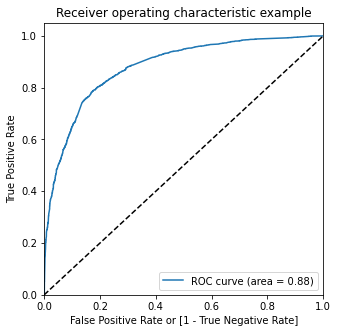

In [118]:
#Plotting the ROC Curve

# UDF to draw ROC curve 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

In [119]:
#Finding Optimal Cutoff Point/ Probability

#It is that probability where we get balanced sensitivity and specificity
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.471885,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.074210,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.250326,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.769245,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.214012,3934,0,1,1,1,0,0,0,0,0,0,0


In [120]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.587044  0.973236  0.349075
0.2   0.2  0.722480  0.920519  0.600450
0.3   0.3  0.791280  0.834955  0.764368
0.4   0.4  0.812461  0.765207  0.841579
0.5   0.5  0.806122  0.659773  0.896302
0.6   0.6  0.793135  0.587591  0.919790
0.7   0.7  0.779221  0.508516  0.946027
0.8   0.8  0.753865  0.404298  0.969265
0.9   0.9  0.707174  0.245742  0.991504


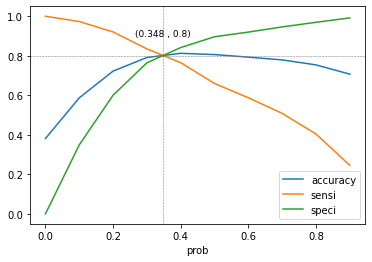

In [121]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

In [122]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.345 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted
0,0,0.471885,1871,1
1,0,0.074210,6795,0
2,0,0.250326,3516,0
3,0,0.769245,8105,1
4,0,0.214012,3934,0


In [123]:
#Calculating all metrics using confusion matrix for Train
# Checking the overall accuracy.


print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

# or can be found using confusion matrix with formula, lets find all matrix in one go ahead using UDF


0.8059678416821274


In [124]:
# UDF for all Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))

In [125]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3232  770]
 [ 485 1981]] 

************************************************** 

True Negative                    :  3232
True Positive                    :  1981
False Negative                   :  485
False Positve                    :  770
Model Accuracy                   :  0.806
Model Sensitivity                :  0.8033
Model Specificity                :  0.8076
Model Precision                  :  0.7201
Model Recall                     :  0.8033
Model True Positive Rate (TPR)   :  0.8033
Model False Positive Rate (FPR)  :  0.1924


************************************************** 



In [126]:
#Precision and recall tradeoff

In [127]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

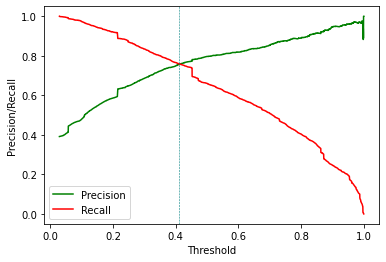

In [128]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

In [129]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,precision_recall_prediction
0,0,0.471885,1871,1,1
1,0,0.074210,6795,0,0
2,0,0.250326,3516,0,0
3,0,0.769245,8105,1,1
4,0,0.214012,3934,0,0


In [130]:
## Lets see all matrics at 0.41 cutoff in precision-recall view and compare it with 0.345 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")


************************************************** 

Confusion Matrix
[[3399  603]
 [ 592 1874]] 

************************************************** 

True Negative                    :  3399
True Positive                    :  1874
False Negative                   :  592
False Positve                    :  603
Model Accuracy                   :  0.8152
Model Sensitivity                :  0.7599
Model Specificity                :  0.8493
Model Precision                  :  0.7566
Model Recall                     :  0.7599
Model True Positive Rate (TPR)   :  0.7599
Model False Positive Rate (FPR)  :  0.1507


************************************************** 



In [131]:
#Adding Lead Score Feature to Training dataframe


#A higher score would mean that the lead is hot, i.e. is most likely to convert
#Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [132]:
# Lets add Lead Score 

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score
0,0,0.471885,1871,1,47
1,0,0.074210,6795,0,7
2,0,0.250326,3516,0,25
3,0,0.769245,8105,1,77
4,0,0.214012,3934,0,21


In [133]:
#Making Predictions on test set

#Scaling Test dataset

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              2772 non-null   int64  
 1   TotalVisits                               2772 non-null   float64
 2   Total Time Spent on Website               2772 non-null   int64  
 3   Page Views Per Visit                      2772 non-null   float64
 4   Free_copy                                 2772 non-null   int64  
 5   Lead Origin_Landing Page Submission       2772 non-null   uint8  
 6   Lead Origin_Quick Add Form                2772 non-null   uint8  
 7   Lead Source_Facebook                      2772 non-null   uint8  
 8   Lead Source_Google                        2772 non-null   uint8  
 9   Lead Source_Olark Chat                    2772 non-null   uint8  
 10  Lead Source_Organic Search       

In [134]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[rfe_col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,Current_occupation_Working Professional
4269,0.964504,0,0,0,0,0,0,0,0,1,0,1,0
2376,-0.885371,0,0,1,0,0,0,0,0,1,0,1,0
7766,-0.777416,0,0,0,0,0,0,0,1,0,0,0,1
9199,-0.885371,0,1,0,0,0,0,1,0,0,0,1,0
4359,-0.885371,0,0,1,0,0,1,0,0,0,0,0,0


In [135]:
#Prediction on Test Dataset using final model
# Adding contant value

X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 14)

In [136]:
# making prediction using model 4 (final model)
y_test_pred = logm4.predict(X_test_sm)

In [137]:
# top 10 columns
y_test_pred[:10]

4269    0.697892
2376    0.862654
7766    0.886542
9199    0.057292
4359    0.871751
9186    0.503626
1631    0.419957
8963    0.154180
8007    0.081944
5324    0.298276
dtype: float64

In [138]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.697892
2376,0.862654
7766,0.886542
9199,0.057292
4359,0.871751


In [139]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()


,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [140]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.697892
1,1,2376,0.862654
2,1,7766,0.886542
3,0,9199,0.057292
4,1,4359,0.871751


In [141]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.697892
1,2376,1,0.862654
2,7766,1,0.886542
3,9199,0,0.057292
4,4359,1,0.871751


In [142]:
# taking sensitivity-specificity method at 0.345 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.697892,1
1,2376,1,0.862654,1
2,7766,1,0.886542,1
3,9199,0,0.057292,0
4,4359,1,0.871751,1


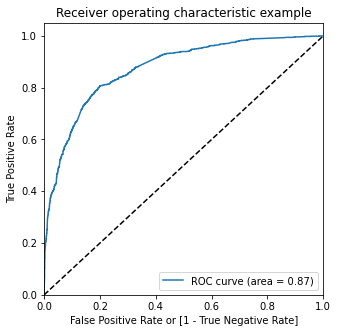

In [143]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

In [144]:
#Test set Model Evaluation
#Calculating all metrics using confusion matrix for Test set

# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[1353  324]
 [ 220  875]] 

************************************************** 

True Negative                    :  1353
True Positive                    :  875
False Negative                   :  220
False Positve                    :  324
Model Accuracy                   :  0.8038
Model Sensitivity                :  0.7991
Model Specificity                :  0.8068
Model Precision                  :  0.7298
Model Recall                     :  0.7991
Model True Positive Rate (TPR)   :  0.7991
Model False Positive Rate (FPR)  :  0.1932


************************************************** 



In [145]:
#For Test set
#Accuracy : 80.34%
#Sensitivity : 79.82% ≈ 80%
#Specificity : 80.68%



In [146]:
# features and their coefficicent from final model
parameters=logm4.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website               5.425696
Lead Source_Reference                      2.946242
Current_occupation_Working Professional    2.659976
Last Activity_SMS Sent                     1.914872
Last Activity_Others                       1.117628
Total Time Spent on Website                1.051968
Lead Source_Olark Chat                     0.917136
Last Activity_Email Opened                 0.805559
Last Activity_Olark Chat Conversation     -0.694138
const                                     -0.903890
Last Activity_Email Bounced               -1.031518
Specialization_Hospitality Management     -1.071761
Specialization_Others                     -1.188329
Lead Origin_Landing Page Submission       -1.243095
dtype: float64

In [147]:
#Adding Lead Score Feature to Test dataframe


#A higher score would mean that the lead is hot, i.e. is most likely to convert
#Whereas a lower score would mean that the lead is cold and will mostly not get converted.



In [148]:
# Lets add Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4269,1,0.697892,1,70
1,2376,1,0.862654,1,86
2,7766,1,0.886542,1,89
3,9199,0,0.057292,0,6
4,4359,1,0.871751,1,87


In [ ]:
#Conclusion

#Train - Test



#Train Data Set:
#Accuracy: 80.46%

#Sensitivity: 80.05%

#Specificity: 80.71%



#Test Data Set:
#Accuracy: 80.34%

#Sensitivity: 79.82% ≈ 80%

#Specificity: 80.68%